# LOW CODE ASSIGNMENTS PART 2

## **Pycaret: Classification**

### **Binary Classification**

#### Installing required libraries

In [ ]:
!pip install pycaret
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 830.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

<br>
<br>
<br>

### **Downloading the dataset**

In [ ]:
!kaggle datasets download -d ritesaluja/bank-note-authentication-uci-data
!unzip bank-note-authentication-uci-data.zip

Dataset URL: https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data
License(s): copyright-authors
  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 25.1MB/s]
Archive:  bank-note-authentication-uci-data.zip
  inflating: BankNote_Authentication.csv  


### **Loading required libraries**

In [ ]:
import pandas as pd
from pycaret.classification import *

<br>
<br>
<br>


### **Loading the Bank Note Authentication dataset**

In [ ]:
data = pd.read_csv('BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### **Setting up Pycaret**

In [ ]:
clf1 = setup(data=data, target='class', session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Target,class
2,Target type,Binary
3,Original data shape,"(1372, 5)"
4,Transformed data shape,"(1372, 5)"
5,Transformed train set shape,"(960, 5)"
6,Transformed test set shape,"(412, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


#### **Comparing the baseline models and saving the best one**

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9979,0.9981,1.0000,0.9954,0.9977,0.9958,0.9958,0.0940
et,Extra Trees Classifier,0.9979,1.0000,1.0000,0.9955,0.9977,0.9958,0.9958,0.2210
rf,Random Forest Classifier,0.9948,0.9999,0.9977,0.9908,0.9942,0.9895,0.9896,0.2610
ada,Ada Boost Classifier,0.9927,0.9982,0.9953,0.9886,0.9919,0.9853,0.9854,0.1500
lightgbm,Light Gradient Boosting Machine,0.9927,0.9997,0.9953,0.9885,0.9918,0.9853,0.9853,0.5650
gbc,Gradient Boosting Classifier,0.9906,0.9993,0.9953,0.9839,0.9895,0.9810,0.9812,0.2310
xgboost,Extreme Gradient Boosting,0.9906,0.9998,0.9860,0.9930,0.9894,0.9810,0.9811,0.1100
dt,Decision Tree Classifier,0.9896,0.9894,0.9883,0.9886,0.9883,0.9789,0.9792,0.0760
qda,Quadratic Discriminant Analysis,0.9865,1.0000,1.0000,0.9707,0.9851,0.9727,0.9732,0.0340
lr,Logistic Regression,0.9833,0.9998,0.9953,0.9685,0.9816,0.9664,0.9669,0.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### **Finetuning a Model**

In [ ]:
nb_model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9759,0.8837,0.9268,0.9048,0.8308,0.8315
1,0.8438,0.9623,0.6977,0.9375,0.8000,0.6763,0.6962
2,0.8750,0.9544,0.8837,0.8444,0.8636,0.7484,0.7490
3,0.8333,0.9399,0.7907,0.8293,0.8095,0.6615,0.6621
4,0.8646,0.9623,0.7209,0.9688,0.8267,0.7194,0.7406
5,0.8438,0.9307,0.7907,0.8500,0.8193,0.6820,0.6834
6,0.8542,0.9443,0.8140,0.8537,0.8333,0.7038,0.7045
7,0.7708,0.9030,0.7143,0.7500,0.7317,0.5319,0.5324
8,0.8438,0.9308,0.7857,0.8462,0.8148,0.6800,0.6814


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_nb_model = tune_model(nb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9759,0.8837,0.9268,0.9048,0.8308,0.8315
1,0.8438,0.9618,0.6977,0.9375,0.8000,0.6763,0.6962
2,0.8750,0.9544,0.8837,0.8444,0.8636,0.7484,0.7490
3,0.8333,0.9399,0.7907,0.8293,0.8095,0.6615,0.6621
4,0.8646,0.9627,0.7209,0.9688,0.8267,0.7194,0.7406
5,0.8438,0.9307,0.7907,0.8500,0.8193,0.6820,0.6834
6,0.8542,0.9443,0.8140,0.8537,0.8333,0.7038,0.7045
7,0.7708,0.9030,0.7143,0.7500,0.7317,0.5319,0.5324
8,0.8542,0.9299,0.7857,0.8684,0.8250,0.7005,0.7031


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### **Visualizations**

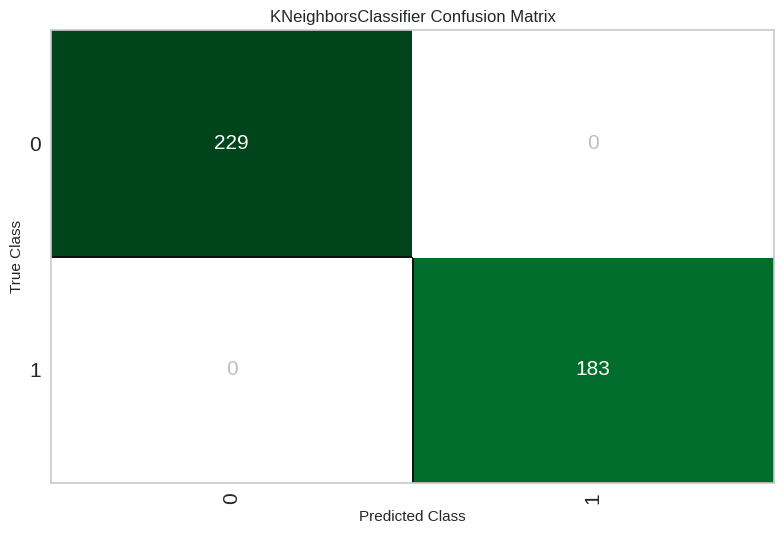

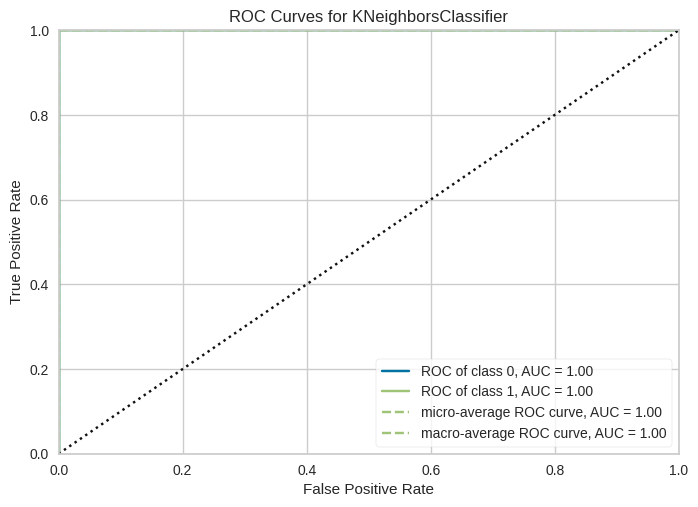

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')
plot_model(best_model, plot = 'auc')

### **Checking the accuracy by predicting on the test dataset**

In [ ]:
new_data = data.copy()  # Use the original dataset for predictions
new_data.drop(columns=['class'], inplace=True)  # Remove the target column
predictions = predict_model(best_model, data=new_data)
predictions.head()

,variance,skewness,curtosis,entropy,prediction_label,prediction_score
0,3.62160,8.6661,-2.8073,-0.44699,0,1.0
1,4.54590,8.1674,-2.4586,-1.46210,0,1.0
2,3.86600,-2.6383,1.9242,0.10645,0,1.0
3,3.45660,9.5228,-4.0112,-3.59440,0,1.0
4,0.32924,-4.4552,4.5718,-0.98880,0,1.0


In [ ]:
save_model(best_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['variance', 'skewness', 'curtosis',
                                              'entropy'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=...
                                                               keep_empty_features=False,
                                          